# Multiple Output Linear Regression in PyTorch: My Summary & Interpretation

## Overview

In this notebook, I implemented and trained a **multiple output linear regression model** using PyTorch. My dataset consists of 20 samples, each with 2 input features, and each sample has 2 target outputs. The targets are generated using a known linear relationship with a small amount of noise.

---

## Data Preparation

- I created a custom `Dataset` class that generates input features (`x`) ranging from -1 to 1 for both columns.
- The targets (`y`) are calculated using a matrix multiplication with a known weight matrix and bias, then small Gaussian noise is added.
- I used a `DataLoader` to enable mini-batch training (batch size 5).

---

## Model Architecture

- I defined a custom `linear_regression` class, which is a wrapper around `nn.Linear` for 2 inputs and 2 outputs.
- The model learns both the weights and biases to map the input features to the two target outputs.

---

## Training

- I used Mean Squared Error (`nn.MSELoss`) as the loss function and Stochastic Gradient Descent (`optim.SGD`) as the optimizer.
- The model was trained for 100 epochs using mini-batch gradient descent.
- During training, I recorded the loss for each batch to monitor convergence.

---

## Results & Interpretation

- The loss plot shows how the model's predictions improve over time as the loss decreases.
- Since the data was generated from a known linear function, the model should be able to learn the underlying relationship very well.
- After training, the model's learned weights and biases should be close to the true values used to generate the data (within the margin of noise).
- This exercise demonstrates how PyTorch can be used for multi-output regression, from data preparation to model training and evaluation.

---

## What I Learned

- How to structure a dataset for multiple outputs in PyTorch.
- How to define and train a linear regression model with more than one output.
- The importance of monitoring loss to ensure the model is learning as expected.
- How mini-batch gradient descent works in practice for regression tasks.

---

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

torch.manual_seed(1)

In [7]:
from torch.utils.data import Dataset, DataLoader  # Import Dataset and DataLoader from PyTorch

class Data(Dataset):  # Define a custom dataset class inheriting from Dataset
    def __init__(self):
        self.x = torch.zeros(20, 2)  # Initialize a tensor of zeros with shape (20, 2) for input features
        self.x[:, 0] = torch.arange(-1, 1, 0.1)  # Fill the first column with values from -1 to 1 (step 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)  # Fill the second column with the same range
        self.w = torch.tensor([[1.0, -1.0], [1.0, 3.0]])  # Define a 2x2 weight matrix for two outputs
        self.b = torch.tensor([[1.0, -1.0]])  # Define a 1x2 bias vector
        self.f = torch.mm(self.x, self.w) + self.b  # Compute the linear function f = xW + b
        self.y = self.f + 0.001 * torch.randn((self.x.shape[0], 2))  # Add small Gaussian noise to targets
        self.len = self.x.shape[0]  # Store the number of samples

    def __getitem__(self, index):
        return self.x[index], self.y[index]  # Return the input and target at the given index

    def __len__(self):
        return self.len  # Return the total number of samples

data_set = Data()  # Instantiate the dataset

# Creating the model, Optimizer, and Total Loss Function (Cost)

In [8]:
class linear_regression(nn.Module):  # Define a custom linear regression class inheriting from nn.Module
    def __init__(self, input_size, output_size):  # Constructor with input and output size
        super(linear_regression, self).__init__()  # Call the parent class constructor
        self.linear = nn.Linear(input_size, output_size)  # Create a linear layer with given input and output size

    def forward(self, x):  # Define the forward pass
        yhat = self.linear(x)  # Apply the linear layer to input x
        return yhat  # Return the output
    
model = linear_regression(2, 2)  # Instantiate the model with input size 2 and output size 2
criterion = nn.MSELoss()  # Define the loss function as Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Define the optimizer as Stochastic Gradient Descent with learning rate 0.01
train_loader = DataLoader(dataset=data_set, batch_size=5)  # Create a DataLoader for the dataset with batch size 5

# Training the model with Mini-Batch Gradient Descent

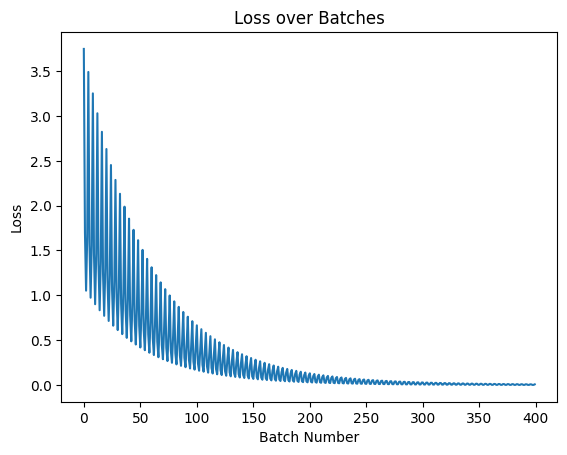

In [9]:
LOSS = []  # List to store loss values for each batch

epochs = 100  # Number of training epochs

for epoch in range(epochs):  # Loop over epochs
    for x, y in train_loader:  # Loop over mini-batches from the DataLoader
        yhat = model(x)  # Make a prediction using the model
        loss = criterion(yhat, y)  # Calculate the loss between prediction and true values
        LOSS.append(loss.item())  # Store the loss value for later analysis
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Backward pass: compute gradients of the loss w.r.t. model parameters
        optimizer.step()  # Update model parameters based on gradients
        
        
# Plotting the loss over epochs
plt.plot(LOSS)  # Plot the loss values
plt.xlabel('Batch Number')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Loss over Batches')  # Title of the plot
plt.show()  # Display the plot